In [27]:
import numpy as np

# Teil a - Perzeptron

Die Klassifizierung anhand eines Perzeptrons kann formal als binäre oder dichotome Klassifizierung betrachtet werden. Die Ziel-Klassen werden als 1 (positive Klasse) und 0 (negative Klasse) bezeichnet. 



## Aufbau des Perceptrons

<img src="./Figures/perceptron.png" alt="drawing" style="width:800px;"/>


### (1) Input $\vec{x}$


$\vec{x}$ wird als Inputvektor bezeichnet und repräsentiert die Eingangsdaten. Die Werte werden übereinander geschrieben: Spaltenschreibweise.

### (2) Gewicht $\vec{w}$ 

$\vec{w}$ wird als Gewichtungsvektor bezeichnet. Gewichte stellen die Verbindungen zwischen zwei Neuronen her. Bspw. sendet Neuron A ein Signal an Neuron B. Das Gewicht steuert hierbei, wie stark das Signal in Neuron B ankommt. Ein Wert 0..1 verringert das Signal, ein Wert >1 verstärkt das Signal. Das Gewicht regelt hierbei die Signalstärke. 

Lernen in neuronalen Netzen bedeutet die Anpassung der Gewichte.

Zusätzlich zur Spaltenschreibweise, wird der Gewichtsvektor in Zeilenschreibweise dargestellt, d.h. die Werte werden nebeneinander geschrieben. Hierzu wird dem Gewichtsvektor ein hochgestelltes <i>T</i> angehängt, dies bedeutet <i>transponiert</i>. 

Der Grund hierfür ist, dass damit die Multiplikation zwischen den Inputwerten und den Gewichten einfacher beschrieben werden kann: <br>

### (3) Gewichtete Summe $s$

Die gewichtete Summe bildet die Linearkombination bestehend aus dem Inputvektor $\vec{x}$ und dem Gewichtungsvektor $\vec{w}$: <br>
s = ${w}_1 \cdot {x}_1  + {w}_2 \cdot {x}_2 + ... {w}_n \cdot {x}_n $.


Die Summe aller $w_i \cdot x_i$ lässt sich kompakt darstellen als: $s = \sum^{n}_{i=1}w_i \cdot x_i$. 
 

Die Summe der Produkte der Werte von $\vec{x}$ und $\vec{w}$ wird als Skalarprodukt zweier Vektoren abgekürzt. Hierbei werden Spaltenvektoren in Zeilenvektoren transformiert: $s= w^T x$.

Rechenbeispiel:

$
\begin{pmatrix} 1 & 2 & 3 \end{pmatrix}  
\cdot
\begin{pmatrix} 4 \\ 5 \\ 6 \\ 
\end{pmatrix}  
= 1 \cdot 4 + 2\cdot 5 + 3 \cdot 6 = 32
$
.

#### Ermittlung des Skalarprodukts

Die Multiplikation zweier Vektoren kann anhand der Numpy-Funktion <b>dot()</b> umgesetzt werden. Die Multiplikation wird als <i>Skalarprodukt</i>, <i>Dot-Product</i> oder <i>inneres Produkt</i> bezeichnet. Skalarprodukt, weil das Ergebnis der Multiplikation ein Skalar (dh. ein Wert) ist, und kein Vektor. Dem gegenüber führt der Multiplikationsoperator in Python <b>*</b> die Operation Element für Element aus.

Bilden Sie anhand der Vektoren $\vec{v}_1= [1,2,3]$ und $\vec{v}_2 = [4,5,6]$, abgebildet als Numpy-Arrays, das Skalarprodukt und die elementweise Multiplikation und zeigen Sie die Unterschiede auf.

In [28]:
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])

print(f'Dot-Product of v1 and v2: {v1.dot(v2)}\n')
print(f'Element-wise multiplication of v1 and v2 : {np.multiply(v1,v2)}')

Dot-Product of v1 and v2: 32

Element-wise multiplication of v1 and v2 : [ 4 10 18]


### (4) Stufenfunktion $step$(s)

Für die Stufenfunktion wird folgende Funktion definiert: <br>
$
    step(s) = f(x) = \left\{\begin{array}{lr}
        0, & \text{falls } s < \theta \\
        1, & \text{falls } s \geq \theta
        \end{array}\right\} 
$

Unabhängig vom Eingabewert der Stufenfunktion ist das Ergebnis stets entweder 0 oder 1. Jedoch ist sie vom Schwellenwert Theta $\theta$ abhängig, wann der Sprung von 0 auf 1 stattfindet.

### (5) Output $f_{akt}(\vec{x})$

Ausgangslage folgender Überlegung ist die gewichtete Summe mit der Stufenfunktion (Heaviside-Funktion): <br>
${w}_1 \cdot {x}_1  + {w}_2 \cdot {x}_2 + ... {w}_n \cdot {x}_n \geq \theta$.

Durch Umformung der Ungleichung wird $\theta$ auf die linke Seite gebracht. Das Ergebnis ist ein erweiterter Gewichtsvektor, der um eine Dimension für den Schwellenwert erweitert wird. Die neue Dimension wird am Index 0 eingefügt, sodass der ursprüngliche Vektor inklusive Indizes erhalten bleibt: <br>
${w}_1 \cdot {x}_1  + {w}_2 \cdot {x}_2 + ... {w}_n \cdot {x}_n -\theta \geq  0$.

Damit der Schwellenwert an der Stelle 0 eingefügt werden kann, wird $-\theta$ in $w_0$ umbenannt. Der Vektor $\vec{x}$ wird ebenfalls um einen Wert erweitert. Der Wert für den Input $x_0$ wird mit dem Wert 1 besetzt. Somit existiert eine einheitliche Form um bei der Notation $\vec{w}^T \cdot \vec{x}$ zu bleiben. Es gilt: <br>
${w}_1 \cdot {x}_1  + {w}_2 \cdot {x}_2 + ... {w}_n \cdot {x}_n +w_0 \cdot x_0 \geq  0$.

Diese Form der Nullgewichtung wird in der Literatur als <i>Bias-Neuron</i> bezeichnet. Dadurch ergibt sich folgendes Schaubild:

![title](./Figures/perceptron_erweitert.png)

Die Implementierung auf Code-Ebene weicht davon jedoch etwas ab. <br>
Anstatt den Eingangsvektor $\vec{x}$ mit dem Wert 1 zu erweitern, wird der Wert $w_0$ auf die gewichtete Summe addiert. Formal wiefolgt beschrieben (siehe Skript Prof. Link): 

$s = \vec{w}^T \cdot \vec{x} + w_0$.

## Erste Implementierung

Im folgenden werden die bisher gewonnenen Erkenntnisse in Code umgesetzt. Die Datengrundlage liefert folgende Tabelle (OR-Problem).

<img src="./Figures/or-problem.png" alt="drawing" style="width:600px;"/>

Ingesamt handelt es sich hierbei um vier Inputvektoren. 

Für die Fehlerberechnung der Einzelfehler wird für jeden Input-Vektor der berechnete Output mit dem gewünschten Output verglichen. Das Perceptron kann aufgrund der Heaviside-Funktion entsprechend nur 0 oder 1 ausgeben. Der gewünschte Output ist per Definition ebenfalls 0 oder 1. Somit kann die Differenz nur -1, 0, 1 betragen. In diesem Fall gilt es die Betragsfunktion für den Einzelfehler zu berechnen. Denn sonst würde ein Fehler von -1 den Gesamtfehler verringern. <br>

Die Einzelfehler der Input-Vektren werden summiert und somit der Gesamtfehler bestimmt. Der Gesamtfehler stellt die Ermittlungsgenauigkeit des Perzeptrons dar. <br>

Die Gewichtungen sind mit Werten zu belegen. Experimentieren sie mit den Gewichtungen, sehen sie sich die Fehler an und versuchen sie diese anhand der besprochenen Berechnungen nachzuvollziehen. Wählen Sie die Gewichte so, sodass das OR-Problem gelöst werden kann. 

## Implementierung

Die Implementierung erfolgt innerhalb der Klasse <b>SimplePerceptron</b>. Im folgenden werden die einzelnen Methoden und deren Funktionsweise kurz vorgestellt. <br>

### Konstruktor
Hier ist nichts zu implementieren. <br>

### gewichtete_summe()-Methode:
In dieser Methode soll die beschriebene gewichtete Summe $\vec{w}^T \cdot \vec{x} + w_0$ berechnet werden.

### heaviside()-Methode:
Heaviside-Funktion als Stufenfunktion, dh Schwellenwert ist 0.

### perceptron_eval()-Methode:

<b>Gewichtungen</b>: <br>
Die Gewichtungen in <b>self.w</b> werden mit einem Vektor $\mathbb R^{m+1}$ initialisiert, m gibt die Anzahl der Dimensionen (Merkmale) in der Datensammlung an. Dem ersten Element dieses Vektors (dies entspricht der Bias-Einheit) wird ein Wert zugeordnet. Gehen Sie von zwei Merkmalen aus (wie oben beschrieben).<br>

Implementieren Sie den besprochenen Perceptron-Algorithmus mit den folgenden Schritten:
* Berechnung gewichtete Summe
* Anwendung der Heaviside-Funktion
* Ermittlung des Fehlers
* Ermittlung des Gesamtfehlers

Geben Sie die den Gesamtfehler als Rückgabewert der Methode zurück.

In [29]:
class SimplePerceptron(object):
    def __init__(self):
        pass
    
    
    def heaviside(self, summe):
        # TODO: implement
        schwelle = 0
        if summe >= schwelle:
            return 1
        else:
            return 0

        
    def gewichtete_summe(self, x):
        #return x.dot(self.w)+initial_w
        # TODO: implement
        w0 = self.w[0] #bias
        w_withoutBias = np.delete(self.w, 0) 
        summe = np.dot(x, w_withoutBias)
        summe += w0 # bias addieren        
        return summe
    
    
    def perceptron_eval(self, X,y):
        self.w = np.array([-0.5,1, 1])
        predictions = [self.heaviside(self.gewichtete_summe(data)) for data in X]       
        print(f'gewichtete Summe : {[self.gewichtete_summe(x) for x in X]}')
        print(f'predictions : {np.abs(predictions - y)}') # 0 = richtige Prediction
        return np.sum(predictions - y)

### Algorithmus ausführuen und  Gesamtfehler anzeigen

Führen Sie den SimplePerceptron-Algorithmus mit den beschriebenen Daten uns und geben Sie den Gesamtfehler aus.

In [30]:
# 2 dimensionaler Input: x1, x2
# 4 Inputvektoren
X = np.array([[0,0],[0,1],[1,0],[1,1]])# TODO: implement

# Die 4 gewünschten Ergebniswerte
y = np.array([0,1,1,1]) # TODO: implement

# TODO: implement: USE SimplePerceptron
sp = SimplePerceptron()
res = sp.perceptron_eval(X, y)
print(f'Result : {res}')

gewichtete Summe : [-0.5, 0.5, 0.5, 1.5]
predictions : [0 0 0 0]
Result : 0


## Perzeptron-Lernalgorithmus

<img src="./Figures/vorwaerts_und_rueckwaerts.png" alt="drawing" style="width:300px;"/>

### Vorwärtspfad und Rückwärtspfad
Im vorherigen Teil wurde die Auswertung durch das Netz im Detail besprochen. <br>
Der Vorwärtspfad besteht aus den folgenden Schritten:
1. den Input $x_i$ bereitstellen.
2. die gewichtete Summe $\vec{w}^T \cdot \vec{x} +w_0$ berechnen.
3. die Stufenfunktion anwenden.
4. Output auswerten.

Der Rückwärtspfad, welcher das Lernen des neuronalen Netzes betrifft, besteht aus den folgenden Schritten:
1. Fehler ermitteln.
2. Darauf basierend die Gewichte ändern.
3. Input bei Berechnung des Fehlers miteinbeziehen.

### Lernen in neuronalen Netzen
Nachdem die Eingaben $\vec{x}$ durch die Fragestellung vorgegeben sind, können in neuronalen Netzen nur die Gewichtungen angepasst werden. Dh. es geht um die Anpassung von Gewichten, wenn man von Lernen sprechen. Die Gewichte werden folgendermaßen angepasst.

1. Dem Netz wird ein Lernbeispiel präsentiert.
2. Berechnungen werden durchgeführt.
3. Der Errechnete Wert $\hat{y}$ wird mit dem gewünschten Wert y vergleichen.
4. Basierend auf dem Unterschied des Vergleichs erfolgt die Anpassung der Gewichte.

Das Netz sollte die Beispiele immer besser lernen und das gewünschte Ergebnis erzeugen. Jeder Durchgang (Epoche) sollte eine Verringerung des Fehlers bewirken. Das Verhalten nennt sich Konvergenz, die Regel Lernalgorithmus.

Der Lernalgorithmus kann verbal folgendermaßen beschrieben werden:
1. Initialisierung der Gewichtungen und des Schwellenwertes. Für die Initialisierung gibt es verschiedene Strategien, bspw. Werte im Intervall (-1,1).
2. Wenn die errechnete Ausgabe eines Neurons und der gewünschte Wert übereinstimmen (z.b. 1 und 1), werden die Gewichte nicht verändert.
3. Stimmen die Werte nicht überein: <br>
3.a. Ist die Ausgabe 0 und der Wunschwert 1, so werden alle Gewichte erhöht. Dies geschieht, da der ermittelte Wert zu gering ist und eine Veränderung stattfinden muss. Das berechnete Ergebnis fällt somit höher aus. <br>
3.b. Ist die Ausgabe 1 und der Wunschwert 0, so werden alle Gewichte verringert.


### Perzeptron Lernalgorithmus

Das mit einem Schwellenwert versehene Perzeptron-Modell beruht auf folgender Idee: entweder es feuert oder es feuert nicht. Die Perzeptron-Regel kann durch folgende Schritte zusammengefasst werden:
1. Die Gewichtungen werden mit kleinen zufälligen Werten initialisiert.
2. Mit jedem Trainingsobjekt $x^{(i)}$ werden folgende Schritte durchgeführt: <br>
2.a Berechnung des Ausgabewertes $\hat{y}$. <br>
2.b Aktualisierung der Gewichtungen.

Die Ausgabe entspricht die von der zuvor definierten Sprungfunktion vorhergesagte Klassenbezeichnung. Die gleichzeitige Aktualisierung der Gewichtungen $w_j$ im Gewichtungsvektor <b>w</b> wird folgendermaßen formal beschrieben:

$s^{(i)} = \vec{w}^T \cdot \vec{x}^{(i)} + w_0$ <br>
$\hat{y}^{(i)} = step(s^{(i)})$ <br>
$E= y^{(i)} - \hat{y}^{(i)}$ <br>
$\Delta w_j = \eta \cdot E $ <br>
$w_j = w_j + \Delta w_j \cdot x_j^{(i)} $<br>


$\vec{w}$ der Gewichtsvektor <br>
$\vec{x}^{(i)}$ der <i>i-</i>te Input-Vektor <br>
$w_0$ der Bias-Vektor <br>
$s^{(i)}$ = gewichtete Summe <br>
$E$ Error, Fehler <br>
$y^{(i)}$ die gewünschte/ tatsächliche Klassenbezeichnung des <i>i</i>-ten Trainingsobjekts.<br>
$\hat{y}^{(i)}$ die vorhergesagte Klassenbezeichnung.<br>
$\Delta{w_j}$ bezeichnet die stattfindende Änderung des Gewichts $w_j$ und  wird zur Aktualisierung der Gewichtungen verwendet. <br>
$\eta$ Eta Lernrate (eine Konstante zwischen 0.0 und 1.0) <br>
$w_j$ der <i>j</i>-te Gewichtsvektor  <br>
$x_j^{(i)}$ der <i>j-</i>te Wert  <br>


Es ist wichtig anzumerken, dass alle Gewichtungen im Gewichtungsvektor gleichzeitig aktualisiert werden, sodass $y^{(i)}$ nicht erneut berechnet werden muss, bevor alle Gewichtungen $\Delta w_j$ aktualisiert wurde. <br>

### Beispiele
#### Allgemeines Beispiel

In den beiden Szenarien, in denen das Perzeptron die Klassenbezeichnung korrekt vorhersagt, bleiben die Gewichtungen unverändert: <br>

* $w_j = \eta(-1--1) \cdot x_j^{(i)} = 0.$
* $w_j = \eta(1-1) \cdot x_j^{(i)} = 0.$

Im Falle einer falschen Vorhersage werden die Gewichtungen in Richtung der positiven bzw. negativen Zielklasse verschoben: 

* $w_j = \eta(1--1) \cdot x_j^{(i)} = \eta(2) \cdot x_j^{(i)}.$
* $w_j = \eta(-1-1) \cdot x_j^{(i)} = \eta(-2) \cdot x_j^{(i)}.$




#### Konkretes Beispiel 1

Ein weiteres Beispiel um ein bessers Gespür für den multiplikativen Faktor $x_j^{(i)}$ zu bekommen: <br>

Es gilt: $y^{(i)}$= +1; $\hat{y}^{(i)}$ = -1; $\eta$= 1.

Angenommen $x_j^{(i)}$= 0.5 und dieses Objekt wird mit -1 klassifiziert. Somit ergibt sich folgende Berechnung zur Aktualisierung des Gewichts: <br>

$\Delta w_j = (1--1) \cdot 0.5 = (2) \cdot 0.5 = 1.$

In diesem Fall wird die zugehörige Gewichtung um 1 erhöht. Somit wird die Nettoeingabe $x_j^{(i)} \cdot w_j$ positiver, wenn das nächste Mal auf das Objekt getroffen wird. Und somit die Wahrscheinlichkeit erhöht, dass der Schwellenwert der Sprungfunktion überschritten und das Objekt als +1 klassifiziert wird. Die Aktualisierung der Gewichtungen erfolgt proportional zum Wert $x_j^{(i)}$.

#### Konkretes Beispiel 2
Weiteres Beispiel: 
$x_j^{(i)}$=2 wird irrtürmlich als -1 klassifiziert. Update-Berechnung wiefolgt:
$\Delta w_j = (1--1) \cdot 2 = (2) \cdot 2 = 4.$ <br>
Die Aktualisierung des Objekts erfolgt sogar noch stärker.


### Zusammenfassung
Folgende Abbildung illustriert die Funktionsweise des Perzeptrons:
* nimmt Eingabe $\vec{x}$ entgegen.
* kombiniert diese mit den Gewichtungen $\vec{w}$.
* berechnet die Nettoeingabefunktion.
* diese wird an Aktivierungsfunktion (hier: Heaviside-Funktion) übergeben.
* erzeugt binäre Ausgabe: 0 oder 1.
* dies entspricht der Vorhersage für die Klassenbezeichnung.
* Während der Lernphase wird die Ausgabe genutzt, um
* a) den Fehler festzustellen
* b) die Gewichtungen zu aktualisieren

<img src="./Figures/Perzeptron.png" alt="drawing" style="width:600px;"/>


Es gilt zu beachten, dass die Konvergenz des Perzeptrons nur dann gewährleistet ist, wenn beide Klassen linear trennbar sind. Sollte dies nicht der Fall sein, kann eine maximale Anzahl an Durchläufen der Trainingsdaten (Epochen) oder ein Schwellenwert für die Anzahl der Fehlklassifizierungen definiert werden.

## Implementierung

Die Implementierung erfolgt innerhalb der Klasse <b>Perceptron</b>. Im folgenden werden die einzelnen Methoden und deren Funktionsweise kurz vorgestellt. <br>

### Konstruktor
Das Perceptron-Objekt wird mit der Lernrate <b>eta</b> und der Anzahl der Epochen (Durchläufe der Trainingsdaten) <b>epochs</b> initialisiert. Wählen Sie geeignete Werte für die Epoche (Anzahl der Durchläufe) und die Lernrate Eta.

### gewichtete_summe()-Methode:
In dieser Methode soll die beschriebene gewichtete Summe $\vec{w}^T \cdot \vec{x} + w_0$ berechnet werden. Zur Berechnung des Skalarprodukts zweier Arrays ergeben sich zwei Möglichkeiten. <br>

* Python: via <b>sum(...)</b>. Berechnung wird mit den einzelnen Elementen durchgeführt.<br>
* Numpy: via <b>np.dot(a,b)</b>. Hat den Vorteil, dass arithmetische Operationen vektorisiert sind. Vektorisierung bedeutet, dass arithmetische Operationen automatisch auf alle Elemente eines Arrays angewendet werden. Durch die Formulierung der arithmetischen Operationen als eine Reihe von Array-Rechenanweisungen kann die Fähigkeit moderner CPUs besser genutzt werden. Darüber hinaus verwendet Numpy hochoptimierte Bibliotheken für lineare Algebra wie bspw. BLAS und LAPACK, welche in C oder Fortran implementiert sind.<br>


### heaviside()-Methode:
Implementierung der Heaviside-Funktion. Parameter ist die gewichtete Summe . Es soll die vorhergesagte Klassenbezeichnungen für den Eingangsvektor $\vec{x}$  ermittelt werden. 

### fit()-Methode:

<b>Gewichtungen</b>: <br>

Die Gewichtungen in <b>w</b> werden mit einem Vektor $\mathbb R^{m+1}$ initialisiert, m gibt die Anzahl der Dimensionen (Merkmale) in der Datensammlung an. Dem ersten Element dieses Vektors (dies entspricht der Bias-Einheit) wird der Wert 1 zugeordnet. Gehen Sie von zwei Merkmalen aus (weiter unten wird die Datenstruktur beschrieben).<br>

Die Gewichtungen werden nicht mit null initialisiert, weil sich die Lernrate Eta $\eta$ nur dann auf das Ergebnis der Klassifizierung auswirkt, wenn die Gewichtungen von Null verschiedene Werte besitzt. <br>

Überlegen Sie sich geeignete Initialisierungswerte für die Gewichtungen. Bspw. können die Werte der Gewichtungen einer Normalverteilung entnommen werden. Als Standardabweichung kann hierbei 0.01 dienen. <br>

Hinweis: die Normalverteilung kann via <b>np.random.normal</b> oder <b>np.random.RandomState</b> und <b>randomstate.rgen.normal</b> erzeugt werden.

<b>Funktionsweise</b>: <br>

In dieser Methode soll das Training des neuronalen Netzes umgesetzt werden. <br>

Pro Epoche werden alle Trainingsobjekte durchlaufen und die Gewichtungen gemäß der Perzeptron-Lernregel aktualisiert. Innerhalb der <b>fit()</b>-Methode werden die zuvor definierten Methoden aufgerufen, um die Klassenbezeichnung für die Aktualisierung der Gewichtungen vorherzusagen und die Gewichtungen zu aktualisieren. <br>

Sammeln Sie in einer Liste <b>errors</b> die in jeder Epoche auftretenden Fehlklassifizierungen. Dadurch kann später analysiert werden, wie gut das Perzeptron während des Trainings funktioniert hat. Geben Sie diese Liste als Rückgabewert der Methode zurück.<br>

In [31]:
class Perceptron(object):
    
    def __init__(self, eta=None, epochs=None):
        # TODO : implement
        self.eta = eta
        self.epochs = epochs
        
    def gewichtete_summe(self, x):
        # TODO: implement
        #print(self.w)
        w0 = self.w[0] #bias
        w_withoutBias = np.delete(self.w, 0) 
        #print(w0)
        #print(w_withoutBias)
        summe = np.dot(x, w_withoutBias)
        #print(summe)
        summe += w0 # bias addieren        
        return summe
        
    def heaviside(self, summe):
        # TODO: implement
        schwelle = 0
        if summe >= schwelle:
            return 1
        else:
            return 0
    
    def fit(self, X, y):
        weights = np.random.normal(0.0, 0.01, size=3)
        weights[0] = 1 #bias
        self.w = weights
        errors = []
        
        for current_ep in range(0,self.epochs): # fuer jede Epoche
            sum_fehler = 0
            current_index = 0
            for row in X:
                #row = X[row_index]
                #print(X.info())
                #print(row)
                summe = self.gewichtete_summe(row)
                #print(summe)
                res_perc = self.heaviside(summe) # Ergebnis des Perceptrons 
                #print(res_perc)
                # Fehler berechnen
                fehler = y[current_index] - res_perc
                if(fehler != 0):
                    # Gewichte aktualisieren
                    deltaW = self.eta * fehler                    
                    self.w[1] += deltaW * row[0]
                    self.w[2] += deltaW * row[1]
                    #errors.append(fehler)
                    sum_fehler += abs(fehler)
                    
                current_index += 1
            errors.append(sum_fehler)
                
        return errors

## Datensatz

Für die folgende Implementierung wird der Iris-Datensatz verwendet. Dieser ist unter /Data abgelegt. Lesen Sie den Datensatz ein.

Zur Implementierung werden je zwei Klassen und zwei Merkmale des Iris-Datensatz als zweidimensionalen Merkmalsraum verwendet. Dies geschieht aus praktischen Gründen wie bspw. die Nachvollziehbarkeit der Werte und die Visualisierung der Merkmale.
Selektieren Sie aus dem Datensatz die beiden Klassen *Setosa* und *Versicolor* und  hiervon die beiden Merkmale "Länge des Kelchblatts" und "Länge des Blütenblatts". 

Wählen Sie für die Bestimmung der Eingabematrix <b>X</b> die Merkmale Kelch- und Bluetenblattlaenge (Sepal Length und Petal Length) aus. Wählen für die Bestimmung des Zielvektors $\vec{y}$ die Werte von setosa und versicolor. Setzen Sie hierfür eine Zielvariable auf 1, die andere auf 0.

Visualisieren Sie den entstandenen Merkmalsraum, so dass die verschiedenen Zielvariablen unterscheidbar sind.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
      0    2
0   5.1  1.4
1   4.9  1.4
2   4.7  1.3
3   4.6  1.5
4   5.0  1.4
..  ...  ...
95  5.7  4.2
96  5.7  4.2
97  6.2  4.3
98  5.1  3.0
99  5.7  4.1

[100 rows x 2 columns]


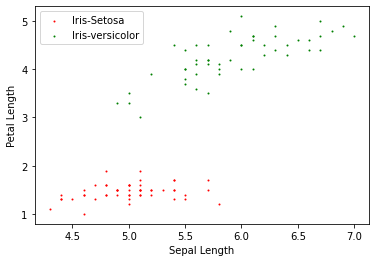

In [32]:
# TODO: implement
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("./Data/iris.data", header=None, sep=",")

df = df.replace('Iris-setosa', 0)
df = df.replace('Iris-versicolor', 1)
# Auswahl von setosa und versicolor
y = np.array(df[0:100:1][4]) # TODO: implement 
print(y)
# Auswahl von Kelch- und Bluetenblattlaenge
df = df.drop(columns=[1,3,4])
X = df[0:100:1]

print(X)

# Diagramm ausgeben
# TODO: implement
x_setosa = df[0:50:1][0]
y_setosa = df[0:50:1][2]
x_versicolor = df[50:100:1][0]
y_versicolor = df[50:100:1][2]

# Plot
plt.scatter(x_setosa, y_setosa, c='red', s=1, label='Iris-Setosa')
plt.scatter(x_versicolor, y_versicolor, c='green', s=1, label='Iris-versicolor')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

Zum Beispiel: <br>
<img src="./Figures/Sepal-Length-Petal-Length.png" alt="drawing" style="width:400px;"/>

## Training und Visualisierung des Errors

Führen Sie das Training anhand der Perzeptron-Klasse und der <b>fit</b>-Methode mit unterschiedlichen Parametern für die Epoche (bspw. 10, 30, 100, etc.) und die Lernrate (bspw. 1, 0.01, 0.00000001, etc.) durch. Visualisieren Sie die von der <b>fit</b>-Methode zurückgegebenen Errors in einem Plot (d.h. x-Achse=Epochen; y-Achse=Fehler). Dieser Plot ist von großer Bedeutung. Hierbei können Sie die Leistungsfähigkeit Ihrer Implementierung prüfen.

Vergleichen Sie die Ergebnisse mit den unterschiedlich gewählten Parametern.

[2, 2, 3, 1, 0, 0, 0, 0, 0, 0]


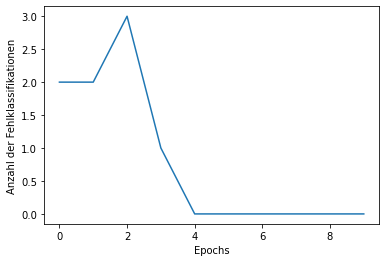

In [33]:
# TODO: Implement
epochs = 10
eta = 1 
# bei 0.1 entstehen zwei spitzen
# bei 0.01 spätere Konvergenz 

pcp = Perceptron(eta, epochs)
errors = pcp.fit(X.values,y)
print(errors)
plt.xlabel('Epochs')
plt.ylabel('Anzahl der Fehlklassifikationen')
plt.plot(np.arange(epochs), errors)

[2, 2, 3, 3, 1, 0, 0, 0, 0, 0]


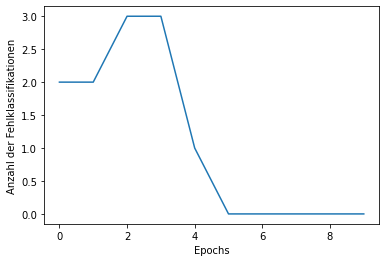

In [34]:
# TODO: Implement
epochs = 10
eta = 0.1 
# bei 0.1 entstehen zwei spitzen
# bei 0.01 spätere Konvergenz 

pcp = Perceptron(eta, epochs)
errors = pcp.fit(X.values,y)
print(errors)
plt.xlabel('Epochs')
plt.ylabel('Anzahl der Fehlklassifikationen')
plt.plot(np.arange(epochs), errors)

[2, 2, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


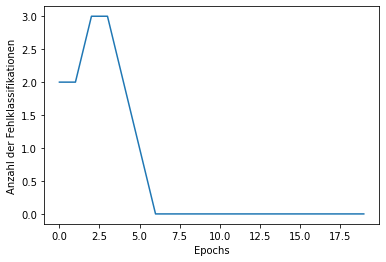

In [35]:
# TODO: Implement
epochs = 20
eta = 0.1 
# bei 0.1 entstehen zwei spitzen
# bei 0.01 spätere Konvergenz 

pcp = Perceptron(eta, epochs)
errors = pcp.fit(X.values,y)
print(errors)
plt.xlabel('Epochs')
plt.ylabel('Anzahl der Fehlklassifikationen')
plt.plot(np.arange(epochs), errors)

[7, 5, 4, 3, 2, 3, 3, 2, 3, 2]


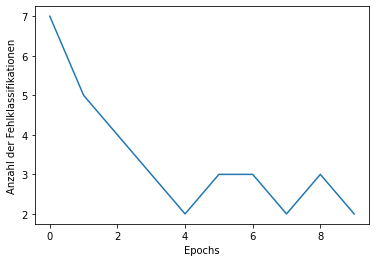

In [36]:
# TODO: Implement
epochs = 10
eta = 0.01 
# bei 0.1 entstehen zwei spitzen
# bei 0.01 spätere Konvergenz 

pcp = Perceptron(eta, epochs)
errors = pcp.fit(X.values,y)
print(errors)
plt.xlabel('Epochs')
plt.ylabel('Anzahl der Fehlklassifikationen')
plt.plot(np.arange(epochs), errors)

[7, 5, 4, 4, 4, 2, 3, 3, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


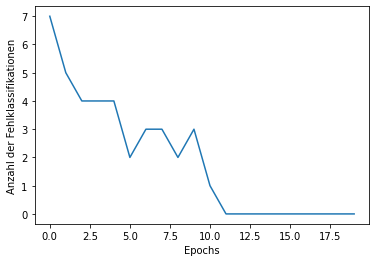

In [37]:
# TODO: Implement
epochs = 20
eta = 0.01 
# bei 0.1 entstehen zwei spitzen
# bei 0.01 spätere Konvergenz 

pcp = Perceptron(eta, epochs)
errors = pcp.fit(X.values,y)
print(errors)
plt.xlabel('Epochs')
plt.ylabel('Anzahl der Fehlklassifikationen')
plt.plot(np.arange(epochs), errors)

Beispiel Error-Plot: <br>

<img src="./Figures/example-error-plot.png" alt="drawing" style="width:400px;"/>